## Appendix LH2 fit

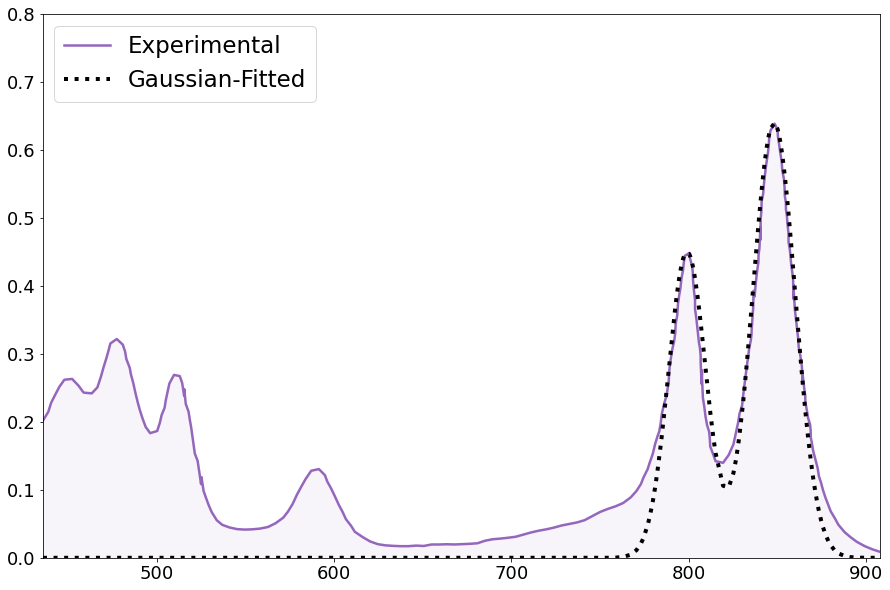

In [25]:
import matplotlib.pyplot as plt #import plt function from matplotlib library
import numpy as np 
from numpy import trapz
from matplotlib.ticker import (MultipleLocator, #major/minor ticks
           FormatStrFormatter, AutoMinorLocator)
import math

#Defining approximate Gaussian values
A1 = 0.45 
A2 = 0.64
mu1 = 799
mu2 = 848
sigma1 = 10.5
sigma2 = 12 


res = 1 

spec_1 = []  
spec_2 = [] 
spec_3 = []

counter = 0 

fin = open('Raw_LH2.txt', 'r') 
fout = open('Appendix_LH2_fit.txt','w') 

for line in fin: 
    line = line.rstrip() 
    elements = line.split('\t') 
    
    wavelength = float(elements[0]) 
    intensity = float(elements[1])
    amplitude_1 = (A1*(math.e**((-(float(elements[0])-mu1)**2)/(2*(sigma1**2))))) + (A2*(math.e**((-(float(elements[0])-mu2)**2)/(2*(sigma2**2)))))
    
    counter = counter + 1 
    
    if counter%res == 0: 
        spec_1.append(wavelength) 
        spec_2.append(amplitude_1) 
        spec_3.append(intensity)
        #fout.write(str(wavelength)+'\t'+str(amplitude_1)+'\n')
        
#Plotting emission spectra
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(spec_1,spec_3,linestyle='-',color='tab:purple',linewidth=2.5,label='Experimental')
ax.plot(spec_1,spec_2,linestyle='dotted',color='k',linewidth=4,label='Gaussian-Fitted')

ax.fill_between(spec_1,spec_3,0,facecolor='tab:purple',alpha=0.07)

ax.set_xlim(min(spec_1), max(spec_1))
ax.set_ylim(0, 0.8)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)

plt.legend(loc=2,prop={'size':23})
plt.savefig('Appendix_LH2_fits.png') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.show() 

fout.close() 
fin.close() 